# Exploration

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from page_rank import *
from utils import *

## Train

In [2]:
graph = text_to_graph('data/train.txt')

In [28]:
train = pd.read_csv('data/train.txt', sep = ' ', names = ['node1', 'node2', 'is_linked'])

In [29]:
train.head()

,node1,node2,is_linked
0,939,3809,1
1,2442,5784,1
2,179,3809,1
3,857,2280,1
4,1358,5722,1


In [31]:
graph = nx.Graph()

for _, row in train.iterrows():
    if row['is_linked'] == 1:
        graph.add_edge(row['node1'], row['node2'])

In [36]:
print(f"The graph has {len(list(graph.nodes()))} nodes")
print(f"The graph has {len(list(graph.edges()))} edges")
print(f"Node 2442 neighbors are {list(graph.neighbors(2442))}")

The graph has 3597 nodes
The graph has 5248 edges
Node 2442 neighbors are [5784, 7021, 5864, 6720, 4782, 3682, 437]


## Test

In [41]:
test = pd.read_csv('data/test.txt', sep = ' ', names = ['node1', 'node2'])

In [42]:
test.head()

,node1,node2
0,3425,4524
1,1620,2617
2,4832,6317
3,4984,7298
4,385,5481


## Node information

In [2]:
node_info = pd.read_csv('data/node_information.csv')

In [20]:
node_info = node_info.rename(columns = {'0' : 'id'})
col_names = {}
for i, col in enumerate(node_info.columns):
    if col != 'id':
        col_names[col] = str(i)
node_info = node_info.rename(columns = col_names)

In [21]:
node_info.sample(5)

,id,1,2,3,4,5,6,7,8,9,...,924,925,926,927,928,929,930,931,932,933
2589,5141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
32,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
3546,7434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1184,2223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1771,3350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [22]:
node_info['nb_features'] = sum(node_info[col] for col in node_info.columns if col not in ['id', 'nb_features'])
node_info[['id', 'nb_features']].sample(5)

,id,nb_features
1424,2666,16.0
618,1147,4.0
1597,2997,8.0
2767,5522,10.0
1073,2013,8.0


## Random predictions

In [23]:
random_pred = pd.read_csv('data/random_predictions.csv')

In [25]:
random_pred.shape

(3498, 2)

In [26]:
random_pred.sample(5)

,ID,Predicted
1541,1541,1
695,695,1
2161,2161,0
2512,2512,0
611,611,1


## To try

### Neighborhood-based methods
- Common neighbors overlap
- Jaccard coefficient
- Adamic / Adar index
- Preferential attachment

### Network proximity-based methods
- Shortest path length
- Katz $_\beta$ measure
- Rooted PageRank

### Supervised features
- in/out degree
- in/out volume
- max flow
- prop flow
- wikipedia features
- PCA ?

### Classifiers
- LogisticRegression
- DecisionTree
- GradientBoosting
- XGB

if time left : Stochastic Random Walk ?

## Network proximity-based methods

### Rooted PageRank

In [3]:
graph.number_of_nodes()

3597

In [4]:
small_graph = nx.Graph()
small_graph.add_edge(1, 2)
small_graph.add_edge(1, 3)
small_graph.add_edge(1, 4)
small_graph.add_edge(2, 3)
small_graph.add_edge(2, 5)
small_graph.add_edge(3, 4)
small_graph.add_edge(4, 5)

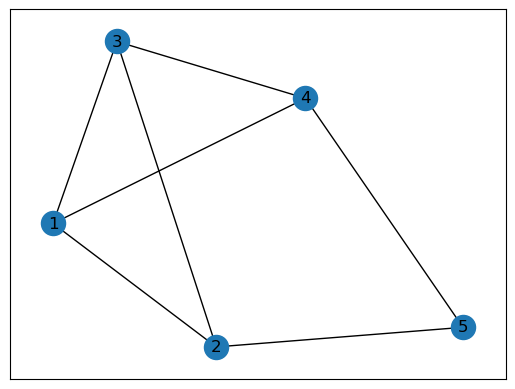

In [5]:
nx.draw_networkx(small_graph)

In [7]:
page_rank(small_graph)

{1: 0.21428596470694788,
 2: 0.21428528678992817,
 3: 0.21428596470694788,
 4: 0.21428528678992817,
 5: 0.14285749700624775}

In [8]:
page_rank(graph)

{939: 9.556161691222108e-05,
 3809: 0.03391114000792957,
 2442: 0.0006555758924260744,
 5784: 0.0003738453124482251,
 179: 0.00037811479046040935,
 857: 0.0006655585755306404,
 2280: 0.0016315987875956004,
 1358: 0.00019275443340021736,
 5722: 0.001264464588221984,
 1459: 0.0001893738965598382,
 5039: 0.0008501020240346702,
 1114: 0.00019253661755945522,
 6614: 0.0003878147636443728,
 4298: 0.0003900685651766784,
 6452: 0.00012587653355125694,
 2366: 0.0010343475288867557,
 3087: 0.0020719925492050277,
 1695: 0.0007571344558424207,
 5788: 0.00047288602018525917,
 4749: 9.497454303283117e-05,
 7174: 0.0029439669377705167,
 520: 0.000660894575220137,
 616: 0.001037699689538178,
 4328: 0.00018731524823112865,
 5380: 0.00018731524823112865,
 1423: 0.0008589159094146833,
 3480: 0.00019067647906855734,
 70: 0.0001931750372523969,
 4674: 9.434762625180638e-05,
 1261: 0.0008645883247236305,
 5518: 0.000281404239852947,
 7098: 0.00018738791033368274,
 4383: 0.0002879709779253062,
 5462: 0.00047